<a href="https://colab.research.google.com/github/rajatgupta3121/DS_projects/blob/main/SugarProductionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/sample_data/List of Countries by Sugarcane Production.csv')

In [5]:
# DATA WRNGLING
df.describe()


,Unnamed: 0
count,103.000000
mean,51.000000
std,29.877528
min,0.000000
25%,25.500000
50%,51.000000
75%,76.500000
max,102.000000


In [6]:
#checking null/missing  value
df.isnull().sum()

,0
Unnamed: 0,0
Country,0
Continent,0
Production (Tons),0
Production per Person (Kg),0
Acreage (Hectare),1
Yield (Kg / Hectare),1


In [7]:
#there are few missing value so that we can drop
df.dropna(inplace=True)
print(df.isnull().sum())


Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             0
Yield (Kg / Hectare)          0
dtype: int64


In [8]:
#displaying all columns
pd.reset_option('max_columns')

In [9]:
#dropping column that is useless durind anlysis
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
#something wrong with dataset as here is dot instead of comma
#to remove this we will replace it with space
# change the value of dataset
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.', '')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.', '').str.replace(',', '.')
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.', "")
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',', '.')

In [11]:
#converting the datatype of columns from object to float
df['Production (Tons)'] = df['Production (Tons)'].astype(float)
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.', '').astype(float)
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].astype(float)
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.','').astype(float)

print(df.dtypes)

Country                        object
Continent                      object
Production (Tons)             float64
Production per Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object


In [12]:
# EXPLORATORY DATA ANALYSIS(EDA)
#looking into the data
print(df.head(10))
pd.reset_option('max_column')
print(df.describe())

                    Country      Continent  Production (Tons)  \
0                    Brazil  South America        768678382.0   
1                     India           Asia        348448000.0   
2                     China           Asia        123059739.0   
3                  Thailand           Asia         87468496.0   
4                  Pakistan           Asia         65450704.0   
5                    Mexico  North America         56446821.0   
6                  Colombia  South America         36951213.0   
7                 Australia        Oceania         34403004.0   
8                 Guatemala  North America         33533403.0   
9  United States of America  North America         29926210.0   

   Production per Person (Kg)  Acreage (Hectare)  Yield (Kg / Hectare)  
0                   3668531.0         10226205.0              751675.0  
1                    260721.0          4950000.0              703935.0  
2                     88287.0          1675215.0              734

Axes(0.125,0.11;0.775x0.77)


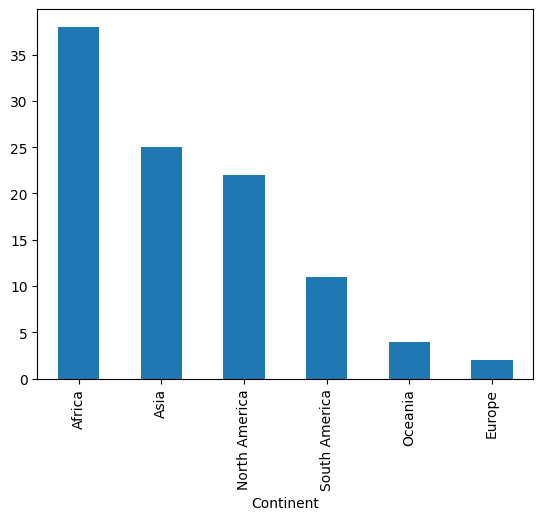

In [13]:
#hom many countries are producing sugarcane

df['Continent'].value_counts()

print(df['Continent'].value_counts().plot(kind="bar"))

<ipython-input-14-4a293efb693d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production (Tons)'])
<ipython-input-14-4a293efb693d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield (Kg / Hectare)'])
<ipython-input-14-4a293efb693d>:7: UserWarning: 

`distplot` is a deprecated func

<Axes: xlabel='Acreage (Hectare)', ylabel='Density'>

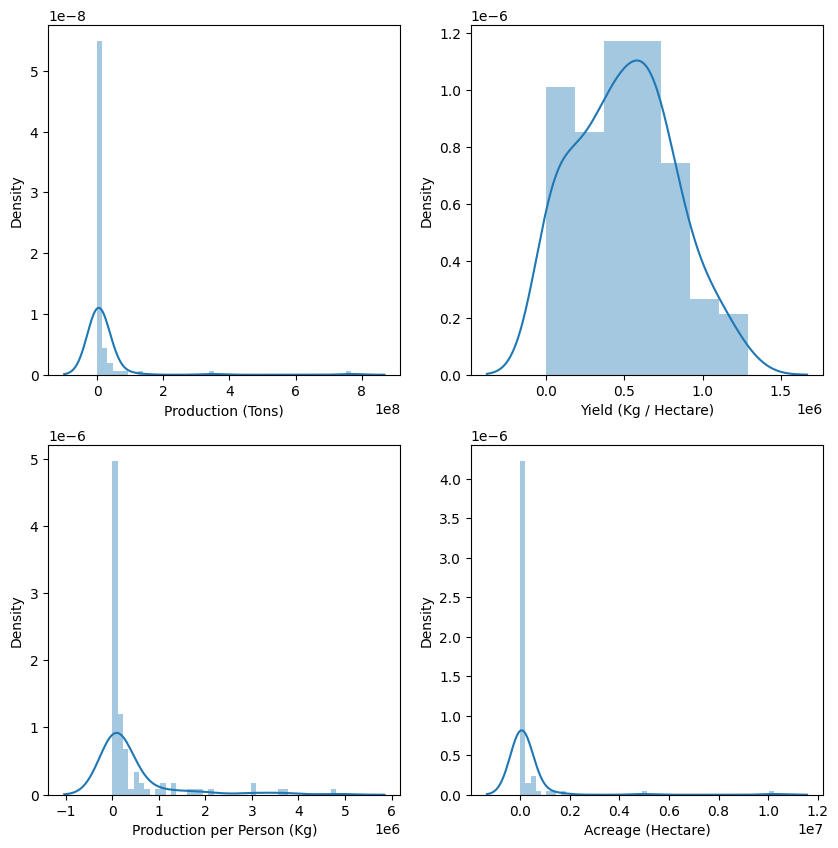

In [14]:
plt.figure(figsize= (10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production (Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Yield (Kg / Hectare)'])
plt.subplot(2,2,3)
sns.distplot(df['Production per Person (Kg)'])
plt.subplot(2,2,4)
sns.distplot(df['Acreage (Hectare)'])

<Axes: ylabel='Acreage (Hectare)'>

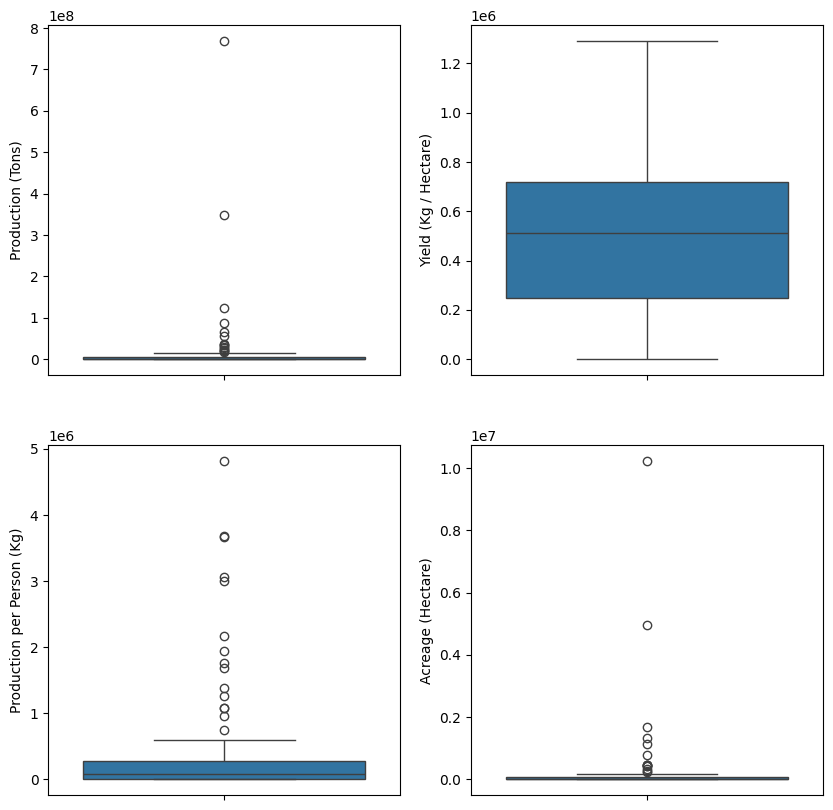

In [15]:
#using box plot to check the outliers in the dataset
#finding outliers in the dataset
plt.figure(figsize= (10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production (Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Yield (Kg / Hectare)'])
plt.subplot(2,2,3)
sns.boxplot(df['Production per Person (Kg)'])
plt.subplot(2,2,4)
sns.boxplot(df['Acreage (Hectare)'])

In [16]:
#using describe to check the ststs of the numerical data
m=df.describe()
print(m)


       Production (Tons)  Production per Person (Kg)  Acreage (Hectare)  \
count       1.020000e+02                1.020000e+02       1.020000e+02   
mean        1.850372e+07                4.124805e+05       2.498981e+05   
std         8.419149e+07                8.669140e+05       1.137003e+06   
min         1.000000e+00                0.000000e+00       0.000000e+00   
25%         6.251875e+04                1.075225e+04       1.104000e+03   
50%         1.440044e+06                8.135850e+04       1.655800e+04   
75%         6.426824e+06                2.828128e+05       8.047400e+04   
max         7.686784e+08                4.816299e+06       1.022620e+07   

       Yield (Kg / Hectare)  
count          1.020000e+02  
mean           5.018502e+05  
std            3.169530e+05  
min            1.000000e+01  
25%            2.487505e+05  
50%            5.102500e+05  
75%            7.198920e+05  
max            1.290493e+06  


In [17]:
# which country produces maximum sugarcane
# to do that we generate a new dataset
#we are doing bivariate analysis of column country and production(tons)
df_new = df[['Country','Production (Tons)']].set_index('Country')

<Axes: >

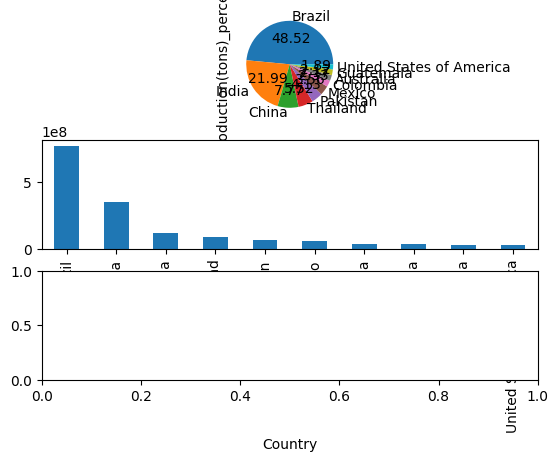

In [18]:
df_new['production(tons)_percent']=df_new['Production (Tons)']*100/df_new['Production (Tons)'].sum()
plt.subplot(3,1,1)
df_new['production(tons)_percent'].head(10).plot(kind='pie',autopct='%.2f')
plt.subplot(3,1,2)
df_new['Production (Tons)'].head(10).plot(kind="bar")
plt.subplot(3,1,3)

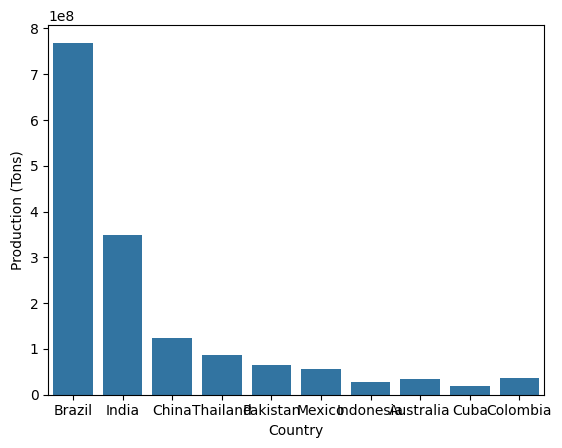

In [19]:
#which country has highest prodction :: Brazil
df_acr = df.sort_values("Acreage (Hectare)",ascending=False)
ax=sns.barplot(data=df_acr.head(10),x="Country",y='Production (Tons)')
plt.show()

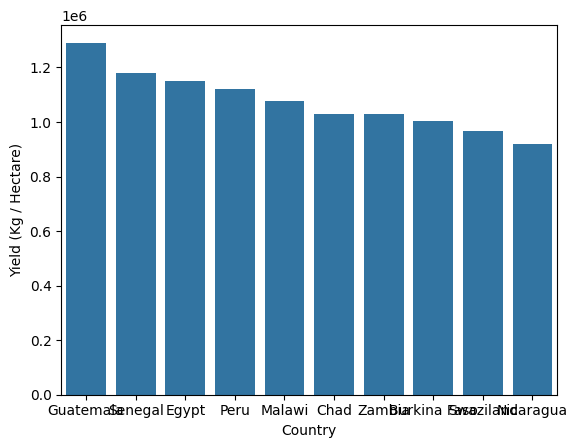

In [20]:
#which country has highest yield per hectare::
plt.subplot(1,1,1 )
df_yield = df.sort_values("Yield (Kg / Hectare)",ascending=False)
bx=sns.barplot(data=df_yield.head(10),x="Country",y='Yield (Kg / Hectare)')
plt.show()

<Axes: >

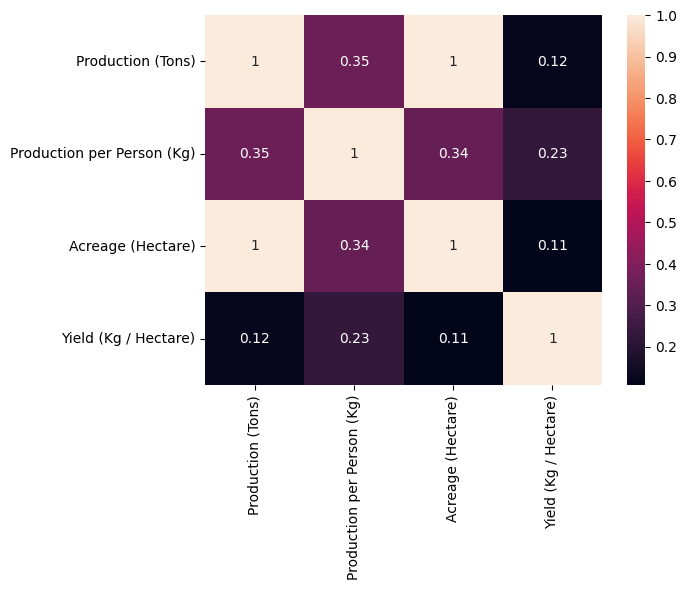

In [22]:
df_num= df[['Production (Tons)','Production per Person (Kg)','Acreage (Hectare)','Yield (Kg / Hectare)']]
cor=df_num.corr()
sns.heatmap(cor,annot=True)

<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

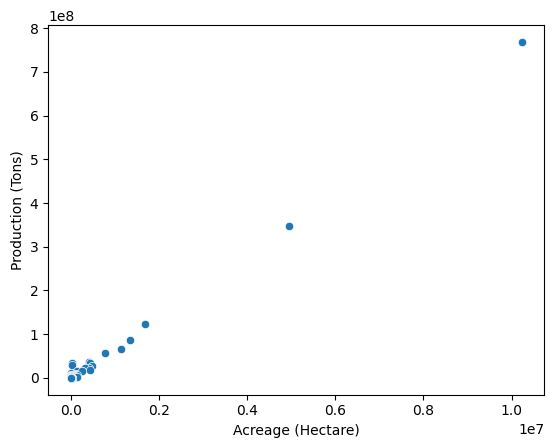

In [23]:
#do countries with highest land produce more sugarcane
plt.subplot(1,1,1 )
sns.scatterplot(data=df,x='Acreage (Hectare)',y='Production (Tons)')

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Production (Tons)'>

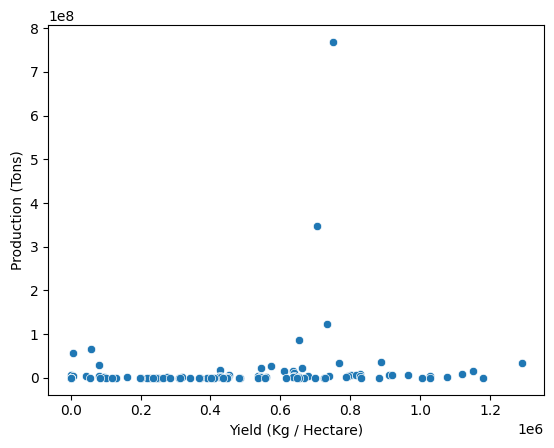

In [24]:
#do countries with yield more sugarcane per hectare more sugarcane in total
plt.subplot(1,1,1 )
sns.scatterplot(data=df,x='Yield (Kg / Hectare)',y='Production (Tons)')

In [25]:
#analysis of continent
df_con=df.groupby('Continent').sum()
df_con["number_of_countries"]=df.groupby('Continent').count()['Country']
print(df_con)

                                                         Country  \
Continent                                                          
Africa         EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...   
Asia           IndiaChinaThailandPakistanIndonesiaPhilippines...   
Europe                                             PortugalSpain   
North America  MexicoGuatemalaUnited States of AmericaCubaEl ...   
Oceania                       AustraliaFijiPapua New GuineaSamoa   
South America  BrazilColombiaArgentinaPeruEcuadorBoliviaParag...   

               Production (Tons)  Production per Person (Kg)  \
Continent                                                      
Africa                89681472.0                  10144110.0   
Asia                 721930425.0                   3120808.0   
Europe                    5823.0                       536.0   
North America        173995947.0                  15420953.0   
Oceania               36177574.0                   3158066.0   
South A

<Axes: xlabel='Continent'>

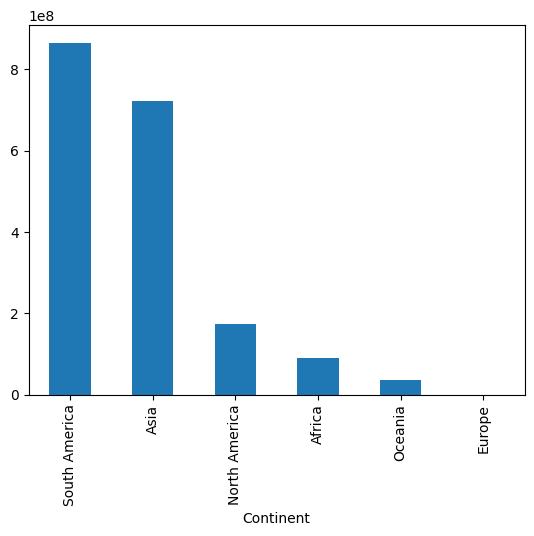

In [26]:
    #which country has highest production ? ::South America
plt.subplot(1,1,1 )
df_con['Production (Tons)'].sort_values(ascending=False).plot(kind='bar')

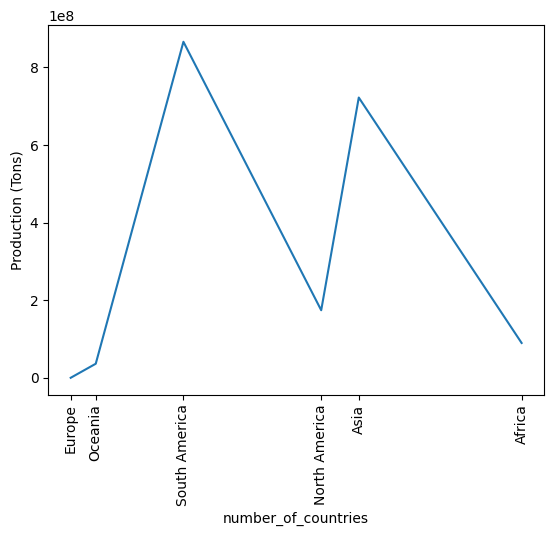

In [27]:
#do number of countries effect the production of sugarcane
plt.subplot(1,1,1 )
con_names=df_con.index.to_list()
sns.lineplot(data=df_con,x='number_of_countries',y="Production (Tons)")
plt.xticks(df_con['number_of_countries'],con_names,rotation=90)
plt.show()


<Axes: ylabel='Production (Tons)'>

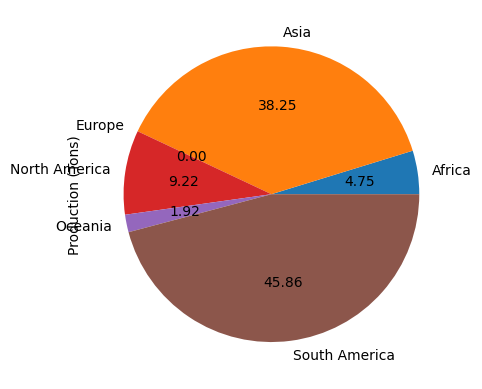

In [28]:
#production distribution by tons
df_con["Production (Tons)"].plot(kind="pie",autopct='%.2f')